In [3]:
from matplotlib import cm 
import gzip
import matplotlib.pyplot as plt
import csv
import numpy as np 
import glob 
import json
import os
import pandas as pd
import seaborn as sns
#import infosys.utils as utils 
from collections import defaultdict
cmap = cm.get_cmap('inferno', 10)

In [72]:
#sorted(list(np.arange(.01, .105, .01))+list(np.arange(.2, .6, .1)))

In [73]:
#len(sorted(list(np.arange(.0, .105, .01))+list(np.arange(.2, .6, .1))))

In [29]:
# load all data and arrange in dataframe

In [4]:
pwd

'/Users/laurajahn/Documents/Git/Marketplace-of-ideas/example'

In [41]:
result_dir = 'results/26102022_friction_vary_friction_and_learning_3_runs'

In [6]:
# look at single results file
#data = json.load(open('results/25102022_friction_vary_friction_and_learning_2_runs/mu_fr_0.025-learn_fr_0.03.json'))
#df = pd.DataFrame.from_dict(data, orient='columns')
#df

In [42]:
filenames = glob.glob(os.path.join(result_dir,'*json*')) 
len(filenames)

211

In [43]:
dfs = [] # an empty list to store the data frames
for file in filenames:
    data = pd.read_json(file, orient='columns') # read data frame from json file
    dfs.append(data) # append the data frame to the list

temp = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [44]:
temp.head()
#data = pd.read_json('results/25102022_friction_vary_friction_and_learning_2_runs/mu_fr_0.025-learn_fr_0.03.json', orient='columns')

,mu_friction,learning_friction,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,phi,alpha,theta,pass_friction,human_network,graph_gml,mode,quality,diversity,discriminative_pow
0,0.1,0.1,NaN,0.05,0.01,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.437077,4.897873,"[0.8233969117266631, 0.0]"
1,0.1,0.1,NaN,0.05,0.01,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.421267,5.017039,"[0.8251443133066051, 0.0]"
2,0.1,0.1,NaN,0.05,0.01,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.401439,4.839922,"[0.826506312062488, 0.0]"
3,0.4,0.4,NaN,0.05,0.01,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.400909,5.283591,"[0.8521786642317171, 0.0]"
4,0.4,0.4,NaN,0.05,0.01,True,False,0.0001,0.5,1,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,data/infosys_network.gml,igraph,0.359600,5.816692,"[0.8542720137285801, 0.0]"


In [45]:
# make discriminative_pow column two columns
temp[['dicriminative_pow_tau','dicriminative_pow_pval']] = pd.DataFrame(temp.discriminative_pow.tolist(), index= temp.index)

In [47]:
# Make quality table
qual_agg = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std']).reset_index()
# this makes hierarchical index qual_agg_2 = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std'])

In [48]:
# Make diversity table
div_agg = temp.groupby(['mu_friction', 'learning_friction'])['diversity'].agg(['mean', 'std']).reset_index()

In [49]:
# Make disrcriminative power table
dp_agg = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_tau'].agg(['mean', 'std']).reset_index()


In [50]:
dp_agg_pval = temp.groupby(['mu_friction', 'learning_friction'])['dicriminative_pow_pval'].agg(['mean', 'std']).reset_index()

In [187]:
no_learn = div_agg.loc[div_agg['learning_friction'] == 0.0] 

learn = div_agg.loc[(div_agg['learning_friction'] > 0.098) & (div_agg['learning_friction'] < 0.13)]

learn_1 = div_agg.loc[(div_agg['learning_friction'] > 0.009) & (div_agg['learning_friction'] < 0.013)]

learn_50 = div_agg.loc[(div_agg['learning_friction'] > 0.49) & (div_agg['learning_friction'] < 0.55)]

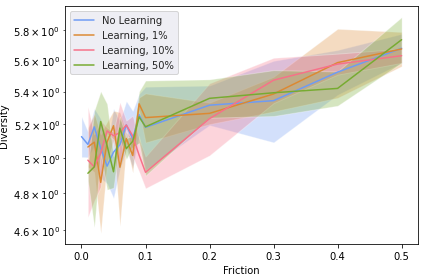

In [188]:
# Diversity
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 10)
with sns.axes_style("darkgrid"):

    meanst = no_learn['mean']
    sdt = no_learn['std']
    
    meanst_learn = learn['mean']
    sdt_learn = learn['std']
        
    meanst_learn_1 = learn_1['mean']
    sdt_learn_1 = learn_1['std']
        
    meanst_learn_50 = learn_50['mean']
    sdt_learn_50 = learn_50['std']
    
    ax.plot(pd.unique(no_learn['mu_friction']), meanst,label = 'No Learning', c=clrs[7])
    ax.fill_between(pd.unique(no_learn['mu_friction']), meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[7])
    
    ax.plot(pd.unique(learn_1['mu_friction']), meanst_learn_1,  label = 'Learning, 1%',c=clrs[1])
    ax.fill_between(pd.unique(learn_1['mu_friction']), meanst_learn_1-sdt_learn_1, meanst_learn_1+sdt_learn_1 ,alpha=0.3, facecolor=clrs[1])
    
    ax.plot(pd.unique(learn['mu_friction']), meanst_learn,  label = 'Learning, 10%',c=clrs[0])
    ax.fill_between(pd.unique(learn['mu_friction']), meanst_learn-sdt_learn, meanst_learn+sdt_learn ,alpha=0.3, facecolor=clrs[0])
   
    ax.plot(pd.unique(learn_50['mu_friction']), meanst_learn_50,  label = 'Learning, 50%',c=clrs[3])
    ax.fill_between(pd.unique(learn_50['mu_friction']), meanst_learn_50-sdt_learn_50, meanst_learn_50+sdt_learn_50 ,alpha=0.3, facecolor=clrs[3])
    
    ax.legend()
    ax.set_yscale('log')
    plt.xlabel("Friction")
    fig.set_tight_layout(True)
    plt.ylabel("Diversity")
    plt.savefig('line_plot_diversity_and_learning.pdf')  

In [182]:
no_learn = dp_agg.loc[dp_agg['learning_friction'] == 0.0] 

learn = dp_agg.loc[(dp_agg['learning_friction'] > 0.098) & (dp_agg['learning_friction'] < 0.13)]

learn_1 = dp_agg.loc[(dp_agg['learning_friction'] > 0.009) & (dp_agg['learning_friction'] < 0.013)]

learn_50 = dp_agg.loc[(dp_agg['learning_friction'] > 0.49) & (dp_agg['learning_friction'] < 0.55)]

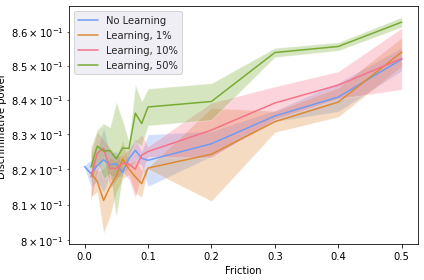

In [183]:
# Discriminative power
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 10)
with sns.axes_style("darkgrid"):

    meanst = no_learn['mean']
    sdt = no_learn['std']
    
    meanst_learn = learn['mean']
    sdt_learn = learn['std']
        
    meanst_learn_1 = learn_1['mean']
    sdt_learn_1 = learn_1['std']
        
    meanst_learn_50 = learn_50['mean']
    sdt_learn_50 = learn_50['std']
    
    ax.plot(pd.unique(no_learn['mu_friction']), meanst,label = 'No Learning', c=clrs[7])
    ax.fill_between(pd.unique(no_learn['mu_friction']), meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[7])

   
    ax.plot(pd.unique(learn_1['mu_friction']), meanst_learn_1,  label = 'Learning, 1%',c=clrs[1])
    ax.fill_between(pd.unique(learn_1['mu_friction']), meanst_learn_1-sdt_learn_1, meanst_learn_1+sdt_learn_1 ,alpha=0.3, facecolor=clrs[1])
    
    ax.plot(pd.unique(learn['mu_friction']), meanst_learn,  label = 'Learning, 10%',c=clrs[0])
    ax.fill_between(pd.unique(learn['mu_friction']), meanst_learn-sdt_learn, meanst_learn+sdt_learn ,alpha=0.3, facecolor=clrs[0])
    
    ax.plot(pd.unique(learn_50['mu_friction']), meanst_learn_50,  label = 'Learning, 50%',c=clrs[3])
    ax.fill_between(pd.unique(learn_50['mu_friction']), meanst_learn_50-sdt_learn_50, meanst_learn_50+sdt_learn_50 ,alpha=0.3, facecolor=clrs[3])
    
    ax.legend()
    ax.set_yscale('log')
    plt.xlabel("Friction")
    fig.set_tight_layout(True)
    plt.ylabel("Discriminative power")
    plt.savefig('line_plot_discriminativepower_and_learning.pdf')  

In [189]:
no_learn = qual_agg.loc[qual_agg['learning_friction'] == 0.0] 

learn = qual_agg.loc[(qual_agg['learning_friction'] > 0.098) & (qual_agg['learning_friction'] < 0.13)]

learn_1 = qual_agg.loc[(qual_agg['learning_friction'] > 0.009) & (qual_agg['learning_friction'] < 0.013)]

learn_50 = qual_agg.loc[(qual_agg['learning_friction'] > 0.49) & (qual_agg['learning_friction'] < 0.55)]

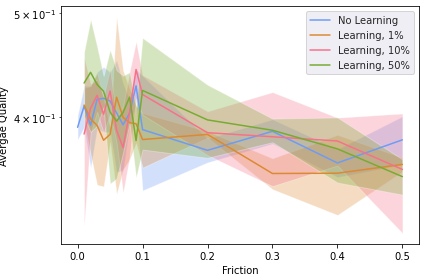

In [190]:
# Quality
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 10)
with sns.axes_style("darkgrid"):

    meanst = no_learn['mean']
    sdt = no_learn['std']
    
    meanst_learn = learn['mean']
    sdt_learn = learn['std']
        
    meanst_learn_1 = learn_1['mean']
    sdt_learn_1 = learn_1['std']
        
    meanst_learn_50 = learn_50['mean']
    sdt_learn_50 = learn_50['std']
    
    ax.plot(pd.unique(no_learn['mu_friction']), meanst,label = 'No Learning', c=clrs[7])
    ax.fill_between(pd.unique(no_learn['mu_friction']), meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[7])
    
    ax.plot(pd.unique(learn_1['mu_friction']), meanst_learn_1,  label = 'Learning, 1%',c=clrs[1])
    ax.fill_between(pd.unique(learn_1['mu_friction']), meanst_learn_1-sdt_learn_1, meanst_learn_1+sdt_learn_1 ,alpha=0.3, facecolor=clrs[1])
    
    ax.plot(pd.unique(learn['mu_friction']), meanst_learn,  label = 'Learning, 10%',c=clrs[0])
    ax.fill_between(pd.unique(learn['mu_friction']), meanst_learn-sdt_learn, meanst_learn+sdt_learn ,alpha=0.3, facecolor=clrs[0])
   
    ax.plot(pd.unique(learn_50['mu_friction']), meanst_learn_50,  label = 'Learning, 50%',c=clrs[3])
    ax.fill_between(pd.unique(learn_50['mu_friction']), meanst_learn_50-sdt_learn_50, meanst_learn_50+sdt_learn_50 ,alpha=0.3, facecolor=clrs[3])
   
    ax.legend()
    ax.set_yscale('log')
    plt.xlabel("Friction")
    fig.set_tight_layout(True)
    plt.ylabel("Avergae Quality")
    plt.savefig('line_plot_quality_and_learning.pdf')  

In [92]:
len(friction)

15

In [93]:
len(meanst)

15